```{=typst}
#set text(
  font: ("Times New Roman", "LXGW WenKai"),
  size: 11pt,
)

= 题目

#h(2em) 轧钢有两道工序：粗轧和精轧。粗轧钢坯时由于各种随机因素的影响，得到的钢材的长度呈正态分布，其均值可由轧机调整，而方差是设备精度决定的，不能改变；精轧时将粗轧得到的钢材轧成规定的长度（可以认为没有误差）。如果粗轧后的钢材长度大于规定长度，精轧时要把多出的部分轧掉，造成浪费：如果粗轧后的钢材长度已经小于规定长度，则整根报废，浪费更大。问题是已知钢材规定的长度 $l$ 和粗轧后的钢材长度的均方差 $sigma$，求可以调整的粗轧时钢材长度的均值 $m$，使总的浪费最小。试从以下两种目标函数中选择一个，在 $l=2$m，$sigma=20$cm条件下求均值 $m$：

#h(2em) （1）每粗轧一根钢材的浪费最小；

#h(2em) （2）每得到一根规定长度钢材的浪费最小。

= 思路

#h(2em) 由获得的长度 $x tilde.op N(m, sigma^2)$，则浪费为：

$
  W = (x - l) I_(x > l) + x I_(x < l)
$

#h(2em) 式中 $I$ 示性函数，从而：

$
  E(W) = E((x - l) I_(x > l)) + E(x I_(x < l))
$

#h(2em) 考虑到正太分布尾部概率较小，$x$ 的取值范围近似为 $(-infinity, +infinity)$，则：

$
  E(W)
  &= integral_l^(+infinity) (x - l) f(x) dif x + integral_(-infinity)^l x f(x) dif x \
  &= integral_(-infinity)^(+infinity) x f(x) dif x - l integral_l^(+infinity) f(x) dif x \
  &= m - l (1 - Phi((l - m) / sigma))
$

#h(2em) 其中 $Phi$ 为标准正态累积分布函数，$m$ 为粗轧时钢材长度的均值。对于问题（1），即求 $E(W)$ 最小值，下面是代码实现：

```


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

In [3]:
# 导入数据
l0 = 2  # m
sigma = 0.2  # m

Optimization terminated successfully.
         Current function value: 0.428912
         Iterations: 13
         Function evaluations: 26
The optimal value of m is: 2.332714843750001
The optimal value of E is: 0.42891239131854797


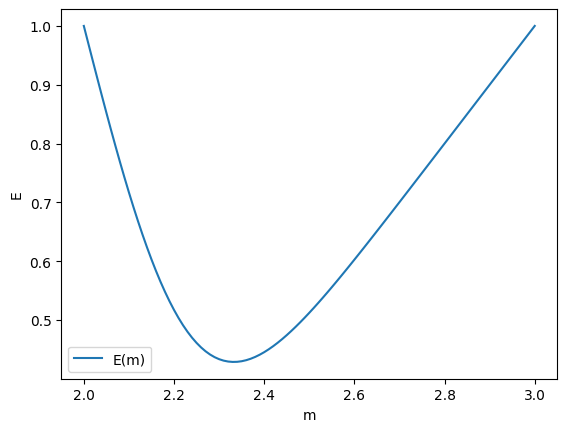

In [18]:
def E(m, l0=l0, sigma=sigma):
  """目标函数"""
  return m - l0 * (1 - stats.norm.cdf((l0 - m) / sigma))


def main():
  """主函数"""
  m = opt.fmin(E, l0)
  print('The optimal value of m is:', end=' ')
  print(*m)
  print('The optimal value of E is:', end=' ')
  print(E(*m))

  # 画图
  x = np.linspace(2, 3, 101)
  y = E(x)
  plt.plot(x, y)
  plt.xlabel('m')
  plt.ylabel('E')
  plt.legend(['E(m)'])
  plt.show()
  pass


main()

```{=typst}
= 结论

对于问题（1），应取 $m=2.33$m。

```